## Python Bibliotheken laden

In [8]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

## Aufbereitete Velozähldaten laden

In [4]:
velo = pd.read_csv("../Daten/velozaehldaten_aufbereitet.csv")

In [11]:
velo['ds'] = pd.to_datetime(velo['ds'], format="%Y-%m-%dT%H:%M")

## Creating and Fitting Prophet Model

In [5]:
# Creating Prophet model and fitting
velo_model = Prophet(n_changepoints=0)
velo_model.add_country_holidays(country_name='CH')
velo_model.fit(velo)

23:12:22 - cmdstanpy - INFO - Chain [1] start processing
23:12:24 - cmdstanpy - INFO - Chain [1] done processing


## Making Predictions

In [6]:
# Making future predictions
future = velo_model.make_future_dataframe(periods=10)
forecast = velo_model.predict(future)

## Plotting Predictions and Actual Values

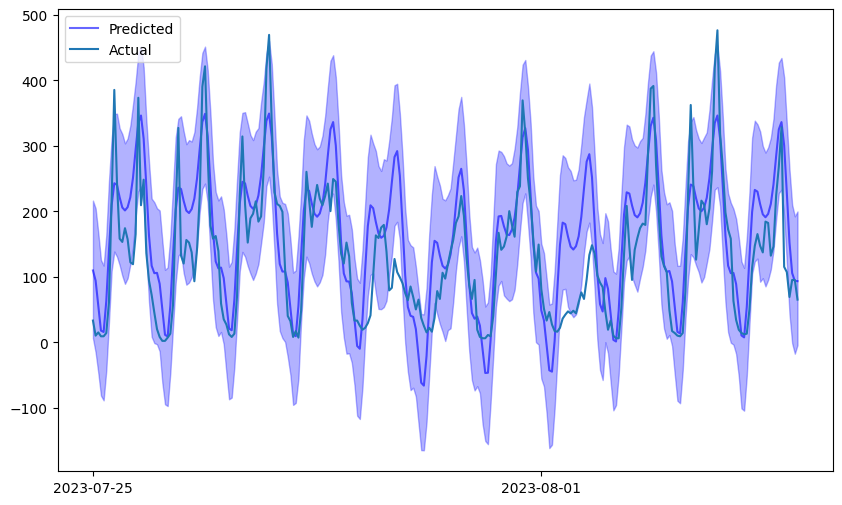

In [12]:
# Filtering data for plotting
start = datetime(2023, 7, 25)
end = datetime(2023, 8, 5)
forecast_filtered = forecast[(forecast['ds'] >= start) & (forecast['ds'] <= end)]
actual_filtered = velo[(velo['ds'] >= start) & (velo['ds'] <= end)]

# Plotting predictions
plt.figure(figsize=(10, 6))
plt.plot(forecast_filtered['ds'], forecast_filtered['yhat'], color='blue', alpha=0.6, label='Predicted')
plt.fill_between(forecast_filtered['ds'], forecast_filtered['yhat_lower'], forecast_filtered['yhat_upper'], color='blue', alpha=0.3)
plt.plot(actual_filtered['ds'], actual_filtered['y'], label='Actual')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.legend()
plt.show()

## Plotting Model Residuals

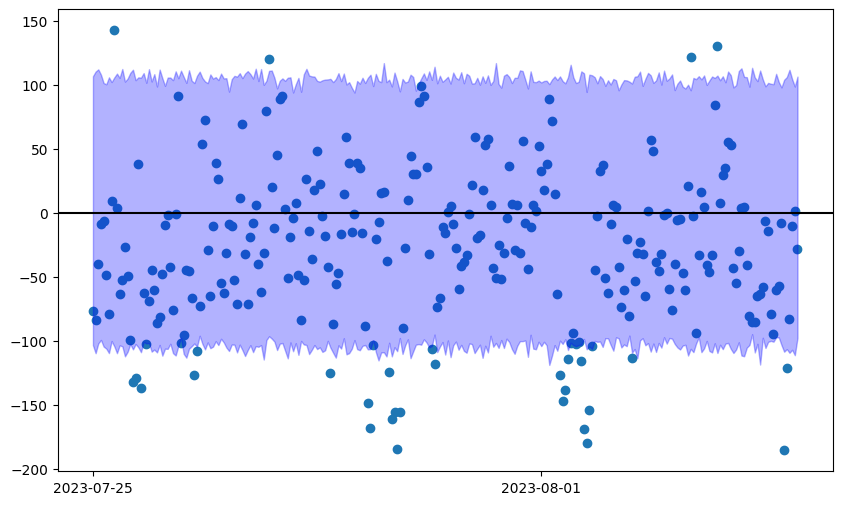

In [13]:
# Calculating residuals
residuals = pd.DataFrame({
    'residuals': actual_filtered['y'] - forecast_filtered['yhat'],
    'ds': actual_filtered['ds'],
    'lower': forecast_filtered['yhat_lower'] - forecast_filtered['yhat'],
    'upper': forecast_filtered['yhat_upper'] - forecast_filtered['yhat']
})

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(residuals['ds'], residuals['residuals'])
plt.fill_between(residuals['ds'], residuals['lower'], residuals['upper'], color='blue', alpha=0.3)
plt.axhline(y=0, color='k')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.show()